In [28]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats
import numpy

chemin_excel ='/Users/eva-andreetiomo/Documents/ENSAE/projet python/Niveau_de_vie_2013_a_la_commune-Global_Map_Solution.xlsx'
df = pd.read_excel(chemin_excel)
print(df.head())
df.columns

  CodePostal              Nom Commune  Niveau de vie Commune  \
0       1001  L'Abergement-Clémenciat           22130.000000   
1       1002    L'Abergement-de-Varey           23213.000000   
2       1004        Ambérieu-en-Bugey           19554.000000   
3       1005      Ambérieux-en-Dombes           22387.619048   
4       1006                  Ambléon           21871.666667   

   NiveaudevieDépartement  
0            22343.574665  
1            22343.574665  
2            22343.574665  
3            22343.574665  
4            22343.574665  


Index(['CodePostal', 'Nom Commune', 'Niveau de vie Commune',
       'NiveaudevieDépartement'],
      dtype='object')

In [29]:
import pandas as pd

# Chargement de la base de données
chemin_excel ='/Users/eva-andreetiomo/Documents/ENSAE/projet python/Niveau_de_vie_2013_a_la_commune-Global_Map_Solution.xlsx'
df = pd.read_excel(chemin_excel)

# Conversion la colonne 'CodePostal' en type chaîne de caractères
df['CodePostal'] = df['CodePostal'].astype(str)

# Ajout d'un zéro aux codes postaux de moins de 5 caractères
df['CodePostal'] = df['CodePostal'].apply(lambda x: x.zfill(5))

# Ajout d'une colonne 'Departement' en extrayant les deux premiers caractères du code postal
df['Departement'] = df['CodePostal'].str[:2]

# Conversion de la colonne 'Revenu' en type numérique
df['NiveaudevieDépartement'] = pd.to_numeric(df['NiveaudevieDépartement'], errors='coerce')

# Sélection de la colonne 'Revenu' correspondant au département
resultat_final = df[['Departement', 'NiveaudevieDépartement']].copy()

# Supprimer les doublons, ne conservant qu'une ligne par département
resultat_final = resultat_final.drop_duplicates()

# Réinitialiser l'index
resultat_final.reset_index(drop=True, inplace=True)

# Afficher le DataFrame résultat
print(resultat_final)

   Departement  NiveaudevieDépartement
0           01            22343.574665
1           02            18111.487190
2           03            18828.862338
3           04            19008.420673
4           05            19202.516480
..         ...                     ...
91          93            17192.209405
92          94            22313.927141
93          95            21296.219805
94          2A            19525.216810
95          2B            18016.138123

[96 rows x 2 columns]


In [30]:
!pip install --upgrade xlrd #colab bug verson xlrd
!pip install geopandas

In [31]:
!pip install plotnine

In [34]:
import geopandas as gpd

# Charger le fichier shapefile des départements français

shapefile_path = '/Users/eva-andreetiomo/Documents/ENSAE/projet python/departements-20170102-shp/departements-20170102.shp'
map_df = gpd.read_file(shapefile_path)

# Afficher les premières lignes du GeoDataFrame
print(map_df.head())

  code_insee          nom  nuts3                 wikipedia wikidata   surf_ha  \
0         43  Haute-Loire  FR723            fr:Haute-Loire   Q12572  500360.0   
1         63  Puy-de-Dôme  FR724            fr:Puy-de-Dôme   Q12694  801543.0   
2         12      Aveyron  FR622  fr:Aveyron (département)    Q3216  877339.0   
3         48       Lozère  FR814   fr:Lozère (département)   Q12580  517505.0   
4         81         Tarn  FR627     fr:Tarn (département)   Q12772  578240.0   

                                            geometry  
0  POLYGON ((3.08206 45.28988, 3.08209 45.29031, ...  
1  POLYGON ((2.38802 45.82583, 2.38802 45.82587, ...  
2  POLYGON ((1.83966 44.47586, 1.83969 44.47613, ...  
3  POLYGON ((2.98226 44.64515, 2.98304 44.64546, ...  
4  POLYGON ((1.53530 43.95960, 1.53551 43.95967, ...  


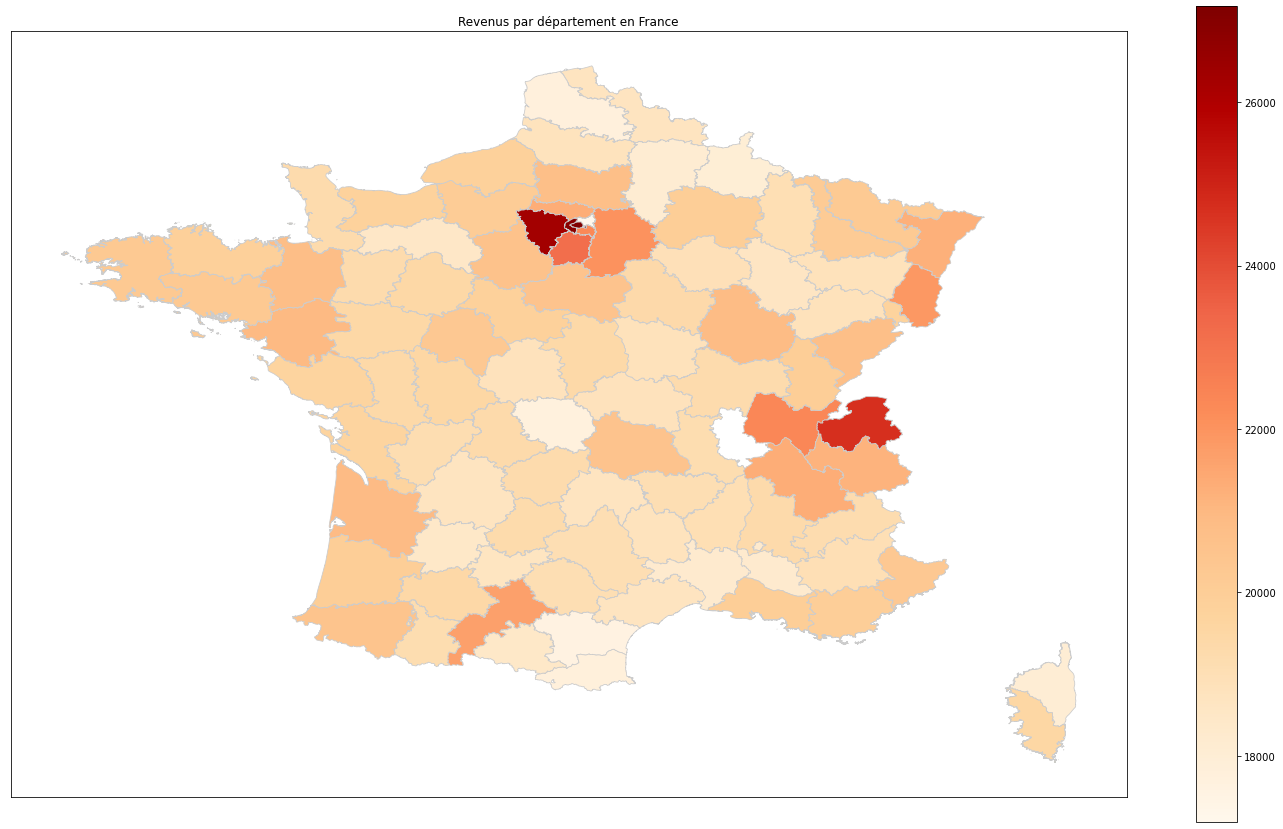

In [41]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

# Chargement du fichier shapefile des départements français
shapefile_path = '/Users/eva-andreetiomo/Documents/ENSAE/projet python/departements-20170102-shp/departements-20170102.shp'
map_df= gpd.read_file(shapefile_path)

# Je reprends le DataFrame avec les revenus par département que je viens de créer

# Fusionner le DataFrame des revenus avec le GeoDataFrame des départements
merged = map_df.set_index('code_insee').join(resultat_final.set_index('Departement'))


# Créer une figure et des axes pour la carte
fig, ax = plt.subplots(1, 1, figsize=(25, 15))

# rendre les axes invisibles
ax = plt.gca()
ax.axes.xaxis.set_visible(False)
ax.axes.yaxis.set_visible(False)

plt.grid(True)

# Plotter la carte en utilisant les revenus pour la coloration
merged.plot(column='NiveaudevieDépartement', cmap='OrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

# Ajouter un titre
plt.title('Revenus par département en France')

# Afficher la carte
plt.show()

In [36]:
import pandas as pd

# Chargement de la base de données
chemin_excel ='/Users/eva-andreetiomo/Documents/ENSAE/projet python/Niveau_de_vie_2013_a_la_commune-Global_Map_Solution.xlsx'
df = pd.read_excel(chemin_excel)

# Conversion la colonne 'CodePostal' en type chaîne de caractères
df['CodePostal'] = df['CodePostal'].astype(str)

# Ajout d'un zéro aux codes postaux de moins de 5 caractères
df['CodePostal'] = df['CodePostal'].apply(lambda x: x.zfill(5))

# Ajout d'une colonne 'Departement' en extrayant les deux premiers caractères du code postal
df['Departement'] = df['CodePostal'].str[:2]

# Sélection de la colonne 'commune' correspondant au département
resultat_villedep = df[['Departement', 'Nom Commune']].copy()

# Réinitialiser l'index
resultat_villedep.reset_index(drop=True, inplace=True)

# Afficher le DataFrame résultat
print(resultat_villedep)

      Departement              Nom Commune
0              01  L'Abergement-Clémenciat
1              01    L'Abergement-de-Varey
2              01        Ambérieu-en-Bugey
3              01      Ambérieux-en-Dombes
4              01                  Ambléon
...           ...                      ...
36567          2B                   Zalana
36568          2B                    Zilia
36569          2B                    Zuani
36570          2B   San-Gavino-di-Fiumorbo
36571          2B                    Chisa

[36572 rows x 2 columns]


In [46]:
import pandas as pd

# Chargement de la base de données des votes par départements
chemin_excel2 ='/Users/eva-andreetiomo/Documents/ENSAE/projet python/votes.xlsx'
df2= pd.read_excel(chemin_excel2)

# Supprimer les colonnes vides
df_sans_colonnes_vides = df2.dropna(axis=1, how='all')

# Afficher le DataFrame après suppression des colonnes vides
print(df_sans_colonnes_vides)


#sélection part des votes pour les écolos par département

    Code du département           Libellé du département  Inscrits  \
0                    01                              Ain    440697   
1                    02                            Aisne    374297   
2                    03                           Allier    250510   
3                    04          Alpes-de-Haute-Provence    128623   
4                    05                     Hautes-Alpes    113917   
..                  ...                              ...       ...   
102                  ZP              Polynésie française    206297   
103                  ZS         Saint-Pierre-et-Miquelon      5053   
104                  ZW                 Wallis et Futuna      9592   
105                  ZX    Saint-Martin/Saint-Barthélemy     24563   
106                  ZZ  Français établis hors de France   1446633   

     Abstentions  % Abs/Ins  Votants  % Vot/Ins  Blancs  % Blancs/Ins  \
0         229508      52.08   211189      47.92    2964          0.67   
1         202

In [52]:
# suppression de quelques colonnes
colonnes_a_supprimer = ['Inscrits', 'Abstentions', '% Abs/Ins','Votants','% Vot/Ins', 'Blancs','% Blancs/Ins','% Blancs/Vot','Nuls','% Nuls/Ins','% Nuls/Vot','Exprimés','% Exp/Ins','% Exp/Vot','Sièges','% Voix/Ins','% Voix/Exp']

# Supprimer les colonnes spécifiées
df_sans_colonnes = df_sans_colonnes_vides.drop(columns=colonnes_a_supprimer)

# Afficher le DataFrame après uppression des colonnes
print(df_sans_colonnes)

    Code du département           Libellé du département Code Nuance  Voix  \
0                    01                              Ain         DXG  1809   
1                    02                            Aisne         DXG  2744   
2                    03                           Allier         DXG  1457   
3                    04          Alpes-de-Haute-Provence         DXG   890   
4                    05                     Hautes-Alpes         DXG   594   
..                  ...                              ...         ...   ...   
102                  ZP              Polynésie française         DXG    86   
103                  ZS         Saint-Pierre-et-Miquelon         DVG  1314   
104                  ZW                 Wallis et Futuna         DVG  1061   
105                  ZX    Saint-Martin/Saint-Barthélemy         DIV   304   
106                  ZZ  Français établis hors de France         RDG   310   

    Parti1  Nbvoix1  %popent1  %popvot1 Parti2  Nbvoix2  ...  %

In [56]:
df_sans_colonnes.columns

Index(['Code du département', 'Libellé du département', 'Code Nuance', 'Voix',
       'Parti1', 'Nbvoix1', '%popent1', '%popvot1', 'Parti2', 'Nbvoix2',
       '%popent2', '%popvot2', 'Parti3', 'Nbvoix3', '%popent3', '%popvot3',
       'Parti4', 'Nbvoix4', '%popent4', '%popvot4', 'Parti5', 'Nbvoix5',
       '%popent5', '%popvot5', 'Parti6', 'Nbvoix6', '%popent6', '%popvot6',
       'Parti7', 'Nbvoix7', '%popent7', '%popvot7', 'Parti8', 'Nbvoix8',
       '%popent8', '%popvot8', 'Parti9', 'Nbvoix9', '%popent9', '%popvot9',
       'Parti10', 'Nbvoix10', '%popent10', '%popvot10', 'Parti11', 'Nbvoix11',
       '%popent11', '%popvot11', 'Parti12', 'Nbvoix12', '%popent12',
       '%popvot12', 'Parti13', 'Nbvoix13', '%popent13', '%popvot13', 'Parti14',
       'Nbvoix14', '%popent14', '%popvot14'],
      dtype='object')

In [62]:
#création nouveau dataframe écolo !
dféco=pd.DataFrame(columns = [['Code du département', 'Libellé du débpartement', 'Nbvoix', '%popent', 'popvot']])

dféco

,Code du département,Libellé du débpartement,Nbvoix,%popent,popvot


In [173]:
dféco1 = df_sans_colonnes[['Code du département', 'Libellé du département', 'Nbvoix1', '%popent1', '%popvot1']].where(df_sans_colonnes['Parti1']=='ECO').dropna()

In [174]:
dféco1 = dféco1.rename(diccolumns1, axis=1)

## 

In [175]:
dféco2 = df_sans_colonnes[['Code du département', 'Libellé du département', 'Nbvoix2', '%popent2', '%popvot2']].where(df_sans_colonnes['Parti2']=='ECO').dropna()

In [176]:
dféco2 = dféco2.rename(diccolumns2, axis =1)

In [177]:
dféco3 = df_sans_colonnes[['Code du département', 'Libellé du département', 'Nbvoix3', '%popent3', '%popvot3']].where(df_sans_colonnes['Parti3']=='ECO').dropna()

In [178]:
diccolumns3 = {'Nbvoix3' : 'Nbvoix', '%popent3' :'%popent', '%popvot3':'%popvot'}

In [179]:
dféco3 = dféco3.rename(diccolumns3, axis=1)

In [162]:
dféco4 = df_sans_colonnes[['Code du département', 'Libellé du département', 'Nbvoix4', '%popent4', '%popvot4']].where(df_sans_colonnes['Parti4']=='ECO').dropna()

In [180]:
diccolumns4 = {'Nbvoix4' : 'Nbvoix', '%popent4' :'%popent', '%popvot4':'%popvot'}

In [181]:
dféco4 = dféco4.rename(diccolumns4, axis=1)

In [183]:
dféco = pd.concat([dféco1, dféco2, dféco3, dféco4], axis=0)

## 

In [185]:
dféco

,Code du département,Libellé du département,Nbvoix,%popent,%popvot
102,ZP,Polynésie française,2477.0,1.20,2.90
104,ZW,Wallis et Futuna,922.0,9.61,12.39
7,08,Ardennes,1331.0,0.71,1.58
9,10,Aube,1887.0,0.91,1.92
14,15,Cantal,7.0,0.01,0.01
...,...,...,...,...,...
86,86,Vienne,3522.0,1.15,2.30
92,92,Hauts-de-Seine,18554.0,1.85,3.54
93,93,Seine-Saint-Denis,8091.0,1.01,2.66
94,94,Val-de-Marne,12593.0,1.57,3.36


## 

## 

In [129]:
#création nouveau dataframe NUPES !
dfnupes=pd.DataFrame(columns = [['Code du département', 'Libellé du débpartement', 'Nbvoix', '%popent', 'popvot']])

dfnupes = dfnupes.rename(['Code du département', 'Libellé du département', 'Nbvoix4', '%popent4', '%popvot4'])

In [134]:
diccolumns1 = {'Nbvoix1' : 'Nbvoix', '%popent1' :'%popent', '%popvot1':'%popvot'}

In [135]:
dfnupes1 = df_sans_colonnes[['Code du département', 'Libellé du département', 'Nbvoix1', '%popent1', '%popvot1']].where(df_sans_colonnes['Parti1']=='NUP').dropna()

In [137]:
dfnupes1 = dfnupes1.rename(diccolumns1, axis = 1)

In [138]:
dfnupes2 = df_sans_colonnes[['Code du département', 'Libellé du département', 'Nbvoix2', '%popent2', '%popvot2']].where(df_sans_colonnes['Parti2']=='NUP').dropna()

In [139]:
diccolumns2 = {'Nbvoix2' : 'Nbvoix', '%popent2' :'%popent', '%popvot2':'%popvot'}

In [146]:
dfnupes2 = dfnupes2.rename(diccolumns2, axis=1)

In [151]:
dfnupes = pd.concat([dfnupes1,dfnupes2], axis=0)